In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from celluloid import Camera
import bar_chart_race as bcr

In [63]:
sales = pd.read_csv('Details.csv')

In [64]:
print(sales.head())

  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25681    1096     658         7  Electronics  Electronic Games   
1  B-26055    5729      64        14    Furniture            Chairs   
2  B-25955    2927     146         8    Furniture         Bookcases   
3  B-26093    2847     712         8  Electronics          Printers   
4  B-25602    2617    1151         4  Electronics            Phones   

   PaymentMode  
0          COD  
1          EMI  
2          EMI  
3  Credit Card  
4  Credit Card  


IndexError: index 3 is out of bounds for axis 0 with size 3

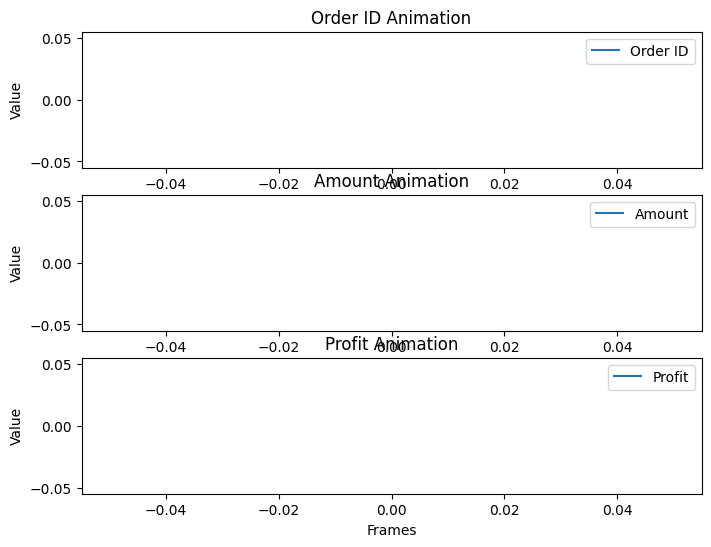

In [65]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np




df = pd.DataFrame(sales)



# Group data by Category
grouped_df = df.groupby('Category').sum()

# Create subplots dynamically based on the number of categories
fig, axs = plt.subplots(len(grouped_df), figsize=(8, 6))

# Ensure axs is an iterable (in case there's only one subplot)
if not isinstance(axs, np.ndarray):
    axs = [axs]

# Initialize line plots
lines = []
for i, (cat, values) in enumerate(grouped_df.items()):
    line, = axs[i].plot([], [], label=cat)
    lines.append(line)
    axs[i].legend()
    axs[i].set_xlabel('Frames')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'{cat} Animation')

# Animation function
def animate(i):
    for j, (cat, values) in enumerate(grouped_df.items()):
        x = np.arange(1, i+1)
        y = values[:i]
        lines[j].set_data(x, y)
    return lines

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=len(grouped_df.values[0]), interval=200, blit=True)

# Save the animation as a GIF file
ani.save('animated_plots.gif', writer='pillow')

# Show the animated charts
plt.show()

